<a target="_blank" href="https://colab.research.google.com/github/ginal001/Drugi-Projekt-MA-I-24-25-/blob/main/Projekt2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Projekt 2 na M'AI

*Autorzy: Piotr Ginalski, Jakub Sęk, Łukasz Wodnicki*

Naszym zadaniem jest napisanie funkcji znajdującej minimum funkcji. Jednocześnie poszukujemy metod, które nie zakładają różniczkowalności naszej funkcji oraz mogące mieć wiele minimum lokalnych. W szczególności jako test bierzemy funkcję
$$
L^k(x) = x^2(\sin kx + 2).
$$
Najpierw dokonamy wizualizacji naszej funkcji.

In [1]:
import matplotlib.pyplot as plt #użyjemy tylko na potrzeby wizualizacji, podobnie pyplota
import random
import math


# Definicja funkcji celu
def L(k, x):
    return x * x * (math.sin(k * x) + 2)

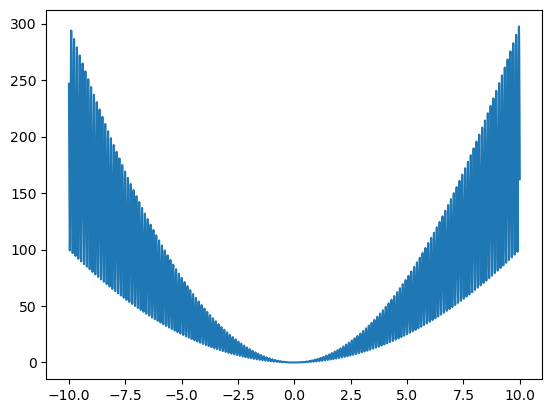

In [2]:
number_of_points = 10000
k = 50

x_list = [-10 + 20*k/number_of_points for k in range(0, number_of_points)]
y_list = [L(k, x) for x in x_list]

plt.plot(x_list, y_list)
plt.show()

Jak widzimy nasza funkcja ma wiele minimów lokalnych. Przejdźmy do opisu metody, której użyjemy do znalezienia minimum tej funkcji.

# Algorytm Symulowanego Wyżarzania

Niech $f \colon X \to \mathbb{R}$ będzie funkcją, której minimum chcemy znaleźć.

---

## 1. Inicjalizacja

- Wybierz początkowe rozwiązanie $x^{(0)} \in X$ (np. losowo).  
- Ustaw początkową temperaturę $T_0 > 0$.  
- Zdefiniuj schemat schładzania, np. wykładniczy:  
  $$
    T_{k+1} = \alpha \, T_k,
    \quad \alpha \in (0,1).
  $$

---

## 2. Główna pętla

Powtarzaj dla $k = 0,1,2,\dots$, aż do spełnienia warunku stopu:

1. **Generacja sąsiada**  
   $$
     x' = x^{(k)} + \delta,
     \quad \delta \sim \mathcal{U}(-\varepsilon,\varepsilon).
   $$

2. **Ocena różnicy energii**  
   $$
     \Delta = f(x') - f\bigl(x^{(k)}\bigr).
   $$

3. **Kryterium akceptacji**  
   $$
     x^{(k+1)} =
     \begin{cases}
       x', & \text{jeśli } \Delta \le 0,\\[4pt]
       x' & \text{z prawdopodobieństwem } 
             \exp\bigl(-\tfrac{\Delta}{T_k}\bigr),\\[4pt]
       x^{(k)}, & \text{w przeciwnym razie.}
     \end{cases}
   $$

4. **Schładzanie**  
   $$
     T_{k+1} = \alpha \, T_k.
   $$

5. **Sprawdzenie warunku stopu**  
   Przykładowe warunki:
   - $k$ osiągnęło maksymalną liczbę iteracji,
   - $T_k$ spadło poniżej zadanej minimalnej wartości,
   - przez ostatnie $\ell$ iteracji nie było akceptacji lepszego rozwiązania.

---

## 3. Zwrócenie wyniku

Po zakończeniu pętli zwróć najlepsze $x$ znalezione w trakcie, tzn.  
$$
  x^* = \arg\min_{0 \le i \le k} f\bigl(x^{(i)}\bigr).
$$

---

Przejdźmy do samego kodu. Zamierzamy szukać minimum, póki nie znajdziemy czegoś mniejszego niż $10^{-6}$ (minimum to 0). Następnie zwrócimy liczbę kroków potrzebną do znalezienia tego minimum (jeśli zostało ono osiągnięte) lub 50000 jeśli to się nie stało. Definiujemy nieco inny schemat schładzania -- domyślnie na danej temperaturze wykonujemy 200 kroków (czyli 200 losowań o danym prawdopodobieństwie przejścia). Dodatkowo aktualna temperatura będzie określała maksymalną odległość sąsiada.

In [3]:
def sa_steps(k, init_temp=2.0, n = 50000, alpha=0.85, steps_per_temp=200, threshold=1e-6):
    x = random.uniform(-10, 10)
    best_val = L(k, x) 
    T = init_temp 
    steps = 0  #inicjalizacja
    while n > steps:  #naszym kryterium stopu jest maksymalna liczba kroków lub próg
        for _ in range(steps_per_temp):
            dx = random.uniform(-1, 1) * T
            x_new = min(max(x + dx, -10), 10) #generacja sąsiada
            v_new = L(k, x_new)
            steps += 1  # każdy krok = jedna ewaluacja nowego x
            if v_new < best_val:
                best_val = v_new
            if v_new < threshold:  # warunek stopu, minimum jest w 0
                return x, steps
            v_curr = L(k, x)
            if v_new < v_curr or random.random() < math.exp((v_curr - v_new) / T):
                x = x_new
        T *= alpha
    
    return x, steps

I ostatecznie, możemy zbadać zależność N vs K.

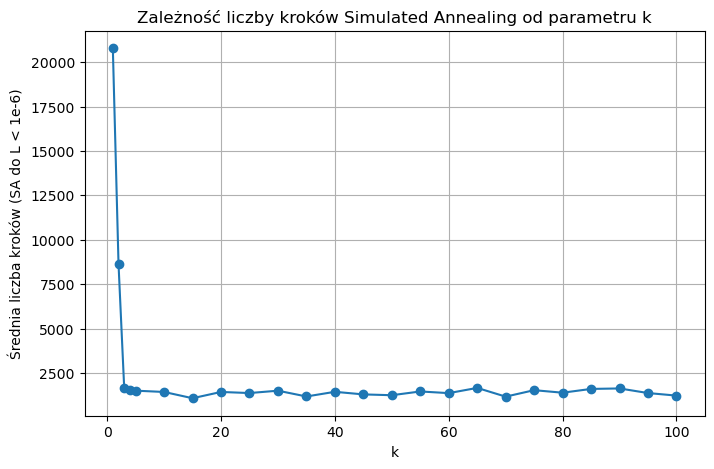

In [4]:
random.seed(42)
k_vals = [1, 2, 3, 4] + [5*k for k in range(1, 21)]
trials = 20

# Obliczanie średniej liczby kroków dla każdego k
avg_steps = []
for k in k_vals:
    mean = 0
    steps_list = [sa_steps(k)[1] for _ in range(trials)]
    for value in steps_list:
        mean += value
    mean = mean / trials
    avg_steps.append(mean)

# Rysowanie wykresu
plt.figure(figsize=(8, 5))
plt.plot(k_vals, avg_steps, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Średnia liczba kroków (SA do L < 1e-6)')
plt.title('Zależność liczby kroków Simulated Annealing od parametru k')
plt.grid(True)
plt.show()

In [5]:
df = dict(zip(k_vals, avg_steps))

df

{1: 20781.65,
 2: 8621.9,
 3: 1640.25,
 4: 1545.55,
 5: 1509.8,
 10: 1436.7,
 15: 1084.45,
 20: 1436.95,
 25: 1375.85,
 30: 1508.0,
 35: 1182.45,
 40: 1445.05,
 45: 1299.55,
 50: 1253.5,
 55: 1464.65,
 60: 1371.4,
 65: 1664.95,
 70: 1173.6,
 75: 1537.05,
 80: 1394.95,
 85: 1607.95,
 90: 1634.6,
 95: 1375.65,
 100: 1231.6}

# Podsumowanie

Ostatecznie, możemy odnotować zbieżność naszej metody dla $K > 3$ w około stałej liczbie kroków. Warto jeszcze zestawić naszą metodę z naiwną metodą Monte Carlo.

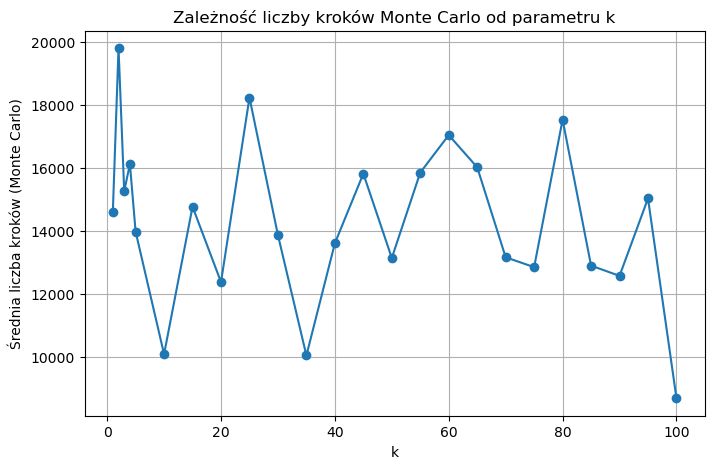

In [6]:
def monte_carlo(k, n = 50000, threshold = 1e-6):
    steps = 0
    for _ in range(n):
        steps += 1
        x = random.uniform(-10, 10)
        if L(k,x) < threshold:
            return x, steps
    return x, steps

random.seed(42)
k_vals = [1, 2, 3, 4] + [5*k for k in range(1, 21)]
trials = 20

# Obliczanie średniej liczby kroków dla każdego k
avg_steps = []
for k in k_vals:
    mean = 0
    steps_list = [monte_carlo(k)[1] for _ in range(trials)]
    for value in steps_list:
        mean += value
    mean = mean / trials
    avg_steps.append(mean)

# Rysowanie wykresu
plt.figure(figsize=(8, 5))
plt.plot(k_vals, avg_steps, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Średnia liczba kroków (Monte Carlo)')
plt.title('Zależność liczby kroków Monte Carlo od parametru k')
plt.grid(True)
plt.show()

In [7]:
df = dict(zip(k_vals, avg_steps))

df

{1: 14608.35,
 2: 19811.9,
 3: 15267.2,
 4: 16130.25,
 5: 13981.15,
 10: 10084.35,
 15: 14773.65,
 20: 12376.9,
 25: 18242.4,
 30: 13871.4,
 35: 10043.1,
 40: 13611.0,
 45: 15823.25,
 50: 13143.25,
 55: 15859.2,
 60: 17050.2,
 65: 16026.1,
 70: 13165.0,
 75: 12851.75,
 80: 17540.45,
 85: 12900.2,
 90: 12574.2,
 95: 15035.95,
 100: 8684.35}

Zatem obserwujemy istotną poprawę w zmniejszeniu ilości próbkowań z funkcji! 